<a href="https://colab.research.google.com/github/rawar/tensorflow-notebooks/blob/master/stock_price_prediction_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict stock prices  with Long short-term memory (LSTM)

This simple example will show you how LSTM models predict time series data. Stock market data is a great choice for this because it's quite regular and widely available via the Internet. 

## Install requirements
We install Tensorflow 2.0 with GPU support first

In [1]:
!pip install tensorflow-gpu==2.0.0-alpha0

In [4]:
!pip install pandas-datareader

## Introduction

LSTMs are very powerful in sequence prediction problems. They can store past information.

## Loading the dataset
I use pandas-datareader to get the historical stock prices from Yahoo! finance. For this example, I get only the historical data till the end of *training_end_data*.  

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data

In [0]:
tickers = 'AAPL'

training_start_date = '1980-12-01'
training_end_date = '2018-12-31'

training_stock_data = data.get_data_yahoo(tickers, training_start_date, training_end_date)

In [105]:
training_stock_data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.515625,0.513393,0.513393,0.513393,117258400.0,0.023007
1980-12-15,0.488839,0.486607,0.488839,0.486607,43971200.0,0.021807
1980-12-16,0.453125,0.450893,0.453125,0.450893,26432000.0,0.020206
1980-12-17,0.464286,0.462054,0.462054,0.462054,21610400.0,0.020706
1980-12-18,0.477679,0.475446,0.475446,0.475446,18362400.0,0.021307
1980-12-19,0.506696,0.504464,0.504464,0.504464,12157600.0,0.022607
1980-12-22,0.531250,0.529018,0.529018,0.529018,9340800.0,0.023707
1980-12-23,0.553571,0.551339,0.551339,0.551339,11737600.0,0.024708
1980-12-24,0.582589,0.580357,0.580357,0.580357,12000800.0,0.026008


In [108]:
training_stock_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,9594.000000,9594.000000,9594.000000,9594.000000,9.594000e+03,9594.000000
mean,26.549240,26.026566,26.297032,26.292735,8.758689e+07,22.587725
std,47.280499,46.462657,46.880676,46.878276,8.676282e+07,44.664584
min,0.198661,0.196429,0.198661,0.196429,3.472000e+05,0.008803
25%,1.071429,1.031295,1.049464,1.051429,3.407435e+07,0.148196
50%,1.696429,1.633929,1.664286,1.665179,5.944890e+07,0.879176
75%,26.317500,25.404285,25.910000,25.841429,1.091926e+08,17.231145
max,233.470001,229.779999,230.779999,232.070007,1.855410e+09,230.275482


In [0]:
training_len = training_stock_data['Close'].count()

I'm only interested in *close* prices

In [0]:
training_close_prices = training_stock_data.iloc[:, 1:2].values

Of course, some of the weekdays might be public holidays in which case no price will be available. For this reason, we will fill the missing prices with the latest available prices

In [0]:
#all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
#close_prices = close_prices.reindex(all_weekdays)
#close_prices = close_prices.fillna(method='ffill')

In [0]:
#print(all_weekdays)

The dataset is now complete and free of missing values. Let's have a look to the data frame summary:

## Feature scaling

In [0]:
#training_set = stock_data.loc[:, 'Close']

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_close_prices)

LSTMs expect the data in a specific format, usually a 3D array (tensor). I start by creating data with 60 days and converting it into an array using NumPy. Next, I convert the data into a 3D dimension array with feature_set samples, 60 days and one feature at each step.

In [0]:
features_set = []
labels = []
for i in range(60, training_len):
    features_set.append(training_set_scaled[i-60:i, 0])
    labels.append(training_set_scaled[i, 0])

features_set, labels = np.array(features_set), np.array(labels)

features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [0]:
#print(X_train)
#print(y_train)

## Create the LSTM network
Let's create a sequenced LSTM network with 50 units. Also the net includes some dropout layers with 0.2 which means that 20% of the neurons will be dropped.

In [0]:
import tensorflow as tf

In [130]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (features_set.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 1)
])

W0329 16:16:34.419621 140264946407296 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f913d2a1748>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0329 16:16:34.435001 140264946407296 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f913d2a1da0>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0329 16:16:34.439998 140264946407296 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f913d2ddf60>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0329 16:16:34.445515 140264946407296 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f913cf36a90>: Note that this layer is not optimized for performance. Please use tf.keras.laye

In [132]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
unified_lstm_12 (UnifiedLSTM (None, 60, 50)            10400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
unified_lstm_13 (UnifiedLSTM (None, 60, 50)            20200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
unified_lstm_14 (UnifiedLSTM (None, 60, 50)            20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
unified_lstm_15 (UnifiedLSTM (None, 50)               

The model will be compiled and optimize by the adam optimizer and set the loss function as mean_squarred_error

In [131]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
9534/9534 [==============================] - 19s 2ms/sample - loss: 0.0018
Epoch 2/100
9534/9534 [==============================] - 18s 2ms/sample - loss: 7.8260e-04
Epoch 3/100
9534/9534 [==============================] - 18s 2ms/sample - loss: 7.1043e-04
Epoch 4/100
9534/9534 [==============================] - 18s 2ms/sample - loss: 5.5695e-04
Epoch 5/100
9534/9534 [==============================] - 18s 2ms/sample - loss: 6.9583e-04
Epoch 6/100
9534/9534 [==============================] - 18s 2ms/sample - loss: 5.1591e-04
Epoch 7/100
9534/9534 [==============================] - 18s 2ms/sample - loss: 5.4808e-04
Epoch 8/100
9534/9534 [==============================] - 18s 2ms/sample - loss: 5.4563e-04
Epoch 9/100
9534/9534 [==============================] - 18s 2ms/sample - loss: 4.7326e-04
Epoch 10/100
9534/9534 [==============================] - 18s 2ms/sample - loss: 5.2747e-04
Epoch 11/100
9534/9534 [==============================] - 18s 2ms/sample - loss: 5.1215e-04
E

In [213]:
#  [samples, days, features]
print(features_set.shape)

(9534, 60, 1)


In [0]:
testing_start_date = '2018-01-01'
testing_end_date = '2019-03-28'

test_stock_data = data.get_data_yahoo(tickers, testing_start_date, testing_end_date)

In [0]:
test_stock_data_processed = test_stock_data.iloc[:, 1:2].values


In [216]:
print(test_stock_data_processed.shape)

(311, 1)


In [217]:
test_inputs = test_stock_data_processed.reshape(-1,1)
test_inputs = sc.transform(test_inputs)
print(test_inputs.shape)

(311, 1)


In [0]:
test_features = []
for i in range(60, 311):
    test_features.append(test_inputs[i-60:i, 0])
    
test_features = np.array(test_features)

In [220]:
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))  
print(test_features.shape)

(251, 60, 1)


In [0]:
predicted_stock_price = model.predict(test_features)

In [0]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

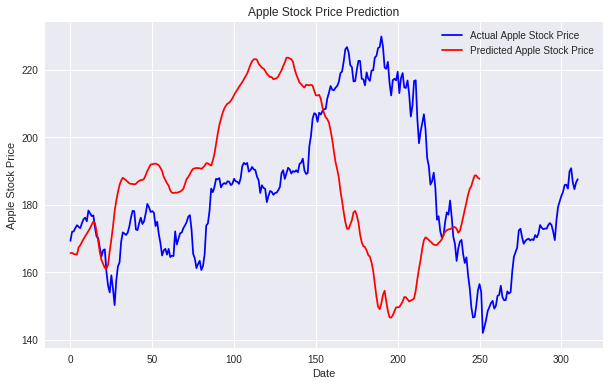

In [224]:
plt.figure(figsize=(10,6))  
plt.plot(test_stock_data_processed, color='blue', label='Actual Apple Stock Price')  
plt.plot(predicted_stock_price , color='red', label='Predicted Apple Stock Price')  
plt.title('Apple Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show()  